In [7]:
import os
import logging
logging.basicConfig()
logging.getLogger("cicliminds_lib").setLevel(logging.INFO)

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cicliminds_lib.masks.masks import get_reference_region_mask

from cicliminds_lib.plotting.plot_recipes import plot_median_idx
from cicliminds_lib.plotting.plot_recipes import plot_spatial_idx_at_t

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["xtick.major.width"] = 1.6
plt.rcParams["xtick.minor.width"] = 0.8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.width"] = 1.6
plt.rcParams["ytick.minor.width"] = 0.8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["font.size"] = 16
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 5
plt.rcParams["savefig.dpi"] = 300/2.4
plt.rcParams["savefig.transparent"] = False
plt.rcParams["savefig.facecolor"] = "white"

In [8]:
DATA_DIR = os.environ["DATA_DIR"]
display(DATA_DIR)

'/home/viktoana/projects/cicero/data/Climdex_base1981-2010'

In [9]:
dat = xr.open_dataset(f"{DATA_DIR}/altcddETCCDI_yr_CNRM-ESM2-1_historical_r1i1p1f2_1850-2014.nc")

Maximum Number of Consecutive Days Per Year with Less Than 1mm of Precipitation


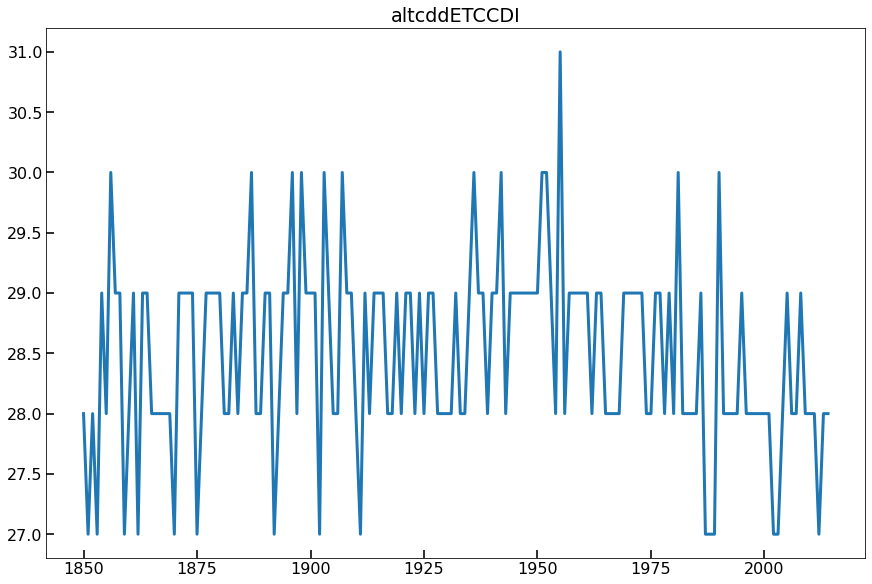

In [10]:
fig, ax = plt.subplots()
plot_median_idx(ax, dat, "altcddETCCDI", 60*60*1E9*24)

Maximum Number of Consecutive Days Per Year with Less Than 1mm of Precipitation


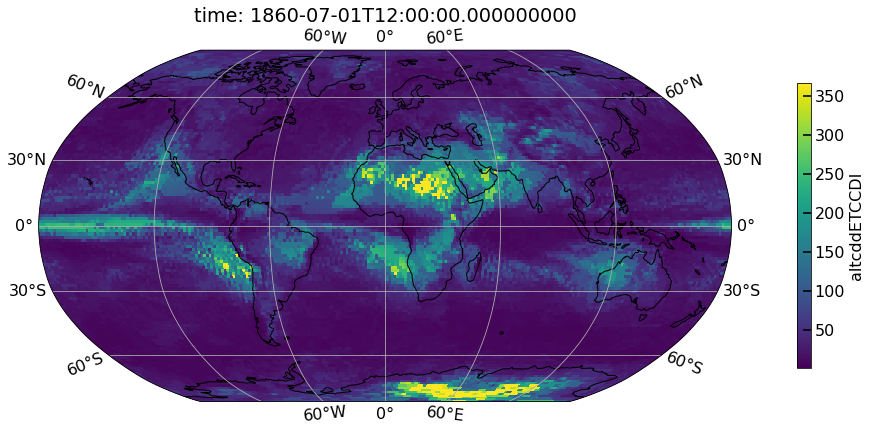

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.Robinson()})
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.stock_img()
ax.set_global()
plot_spatial_idx_at_t(ax, dat, "altcddETCCDI", dat.time.values[10], scale=np.timedelta64(1, 'D'))

Maximum Number of Consecutive Days Per Year with Less Than 1mm of Precipitation


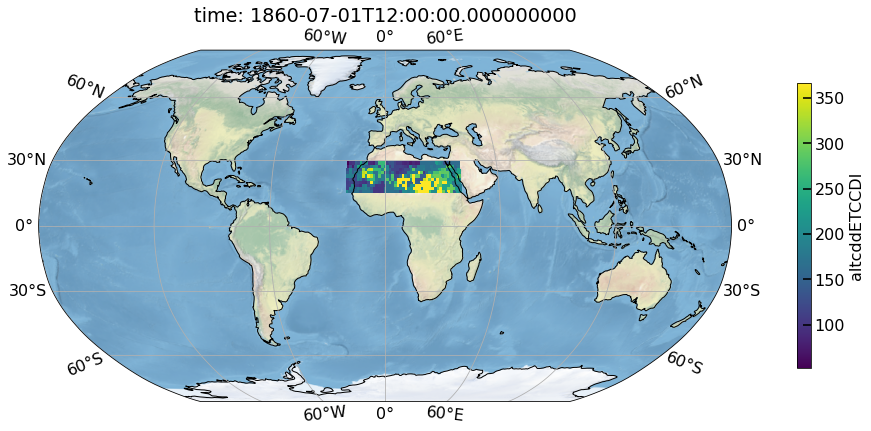

In [12]:
from cicliminds_lib.masks.loaders import load_reference_regions
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.Robinson()})
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.stock_img()
ax.set_global()
mask = get_reference_region_mask(dat, "SAH")
new_dat = dat.where(mask)
plot_spatial_idx_at_t(ax, new_dat, "altcddETCCDI", new_dat.time.values[10], scale=np.timedelta64(1, 'D'))